In [130]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [131]:
cellphone = pd.read_csv(r'E:\INCEPTEZ\Training\Basics_python\Cellphone.csv')

In [132]:
cellphone[:5]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [133]:
cellphone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [134]:
cellphone.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [135]:
cellphone.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [136]:
x =cellphone.drop('price_range', 1)

C:\Users\MUTHUK~1\AppData\Local\Temp/ipykernel_480/2498496834.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x =cellphone.drop('price_range', 1)


In [137]:
x[:3]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0


In [138]:
y=cellphone.iloc[:, -1]

In [139]:
y[:3]

0    1
1    2
2    2
Name: price_range, dtype: int64

### train_test-split

In [140]:
x_train,x_test, y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=1)

### GaussianNB

In [141]:
model= GaussianNB()

In [142]:
model.fit(x_train,y_train)

GaussianNB()

In [143]:
y_pred =model.predict(x_test)

In [144]:
acc =accuracy_score(y_test,y_pred)

In [145]:
acc

0.7575

### BernoulliNb

In [146]:
model= BernoulliNB()

In [147]:
model.fit(x_train,y_train)

BernoulliNB()

In [148]:
y_pred =model.predict(x_test)

In [149]:
acc =accuracy_score(y_test,y_pred)

In [150]:
acc

0.2075

### MultinomialNB

In [151]:
model= MultinomialNB()

In [152]:
model.fit(x_train,y_train)

MultinomialNB()

In [153]:
y_pred =model.predict(x_test)

In [154]:
acc =accuracy_score(y_test,y_pred)
acc

0.5

###  since target is continuous variable, GaussianNb is giving more accuracy

In [155]:

from yellowbrick.classifier import ConfusionMatrix

In [156]:
confusion_matrix(y_test, y_pred)

array([[64, 19,  6,  3],
       [24, 40, 19, 13],
       [ 4, 25, 33, 44],
       [ 0, 17, 26, 63]], dtype=int64)

C:\Users\Muthukumaran\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(


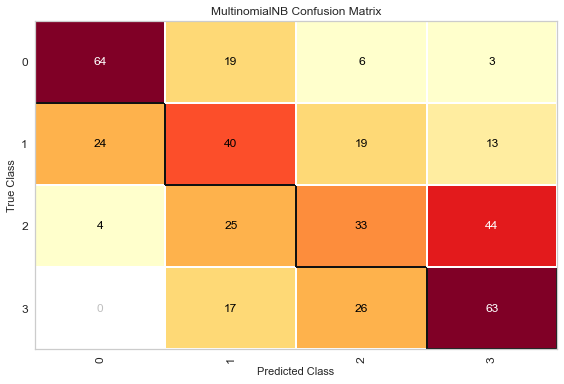

<AxesSubplot:title={'center':'MultinomialNB Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [157]:
cm = ConfusionMatrix(model, classes=[0,1,2,3])
cm.fit(x_train, y_train)
cm.score(x_test, y_test)
cm.show()

In [158]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.70      0.70      0.70        92
           1       0.40      0.42      0.41        96
           2       0.39      0.31      0.35       106
           3       0.51      0.59      0.55       106

    accuracy                           0.50       400
   macro avg       0.50      0.50      0.50       400
weighted avg       0.49      0.50      0.50       400



###  KNNClassfier

In [159]:

from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt


In [160]:
x_train,x_test, y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=1)

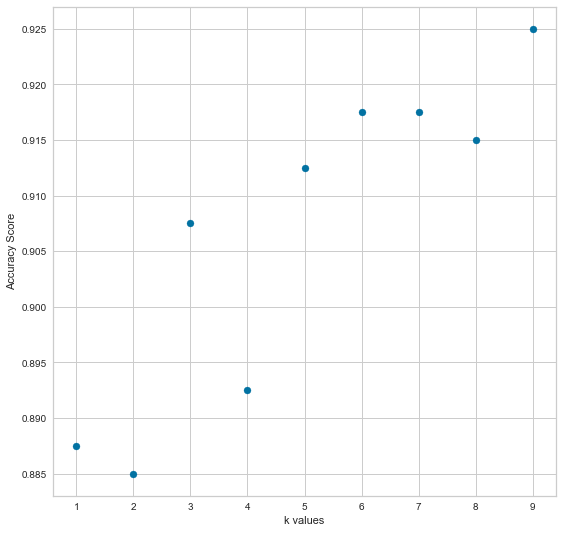

In [161]:
k_range = range(1,10)
score =[]
for i in k_range:
    knn =KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    score.append(knn.score(x_test,y_test))
    
plt.figure(figsize =(9,9))
plt.xlabel('k values')
plt.ylabel('Accuracy Score')
plt.scatter(k_range, score)

### Since K value = 9 has the high accuracy score we will use that

 knn =KNeighborsClassifier(n_neighbors=9)

In [162]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [163]:
knn.score(x_test, y_test)

0.925

###  Prediction

In [164]:
x = np.array(cellphone[["battery_power", "ram", "int_memory", "mobile_wt"]])
y = np.array(cellphone["price_range"])
x_train,x_test, y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=1)

In [165]:
knn =KNeighborsClassifier(n_neighbors=3)

In [166]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [167]:
y_pred =knn.predict(x_test)

In [168]:
accuracy_score(y_pred,y_test)

0.7525

In [169]:
input_data = np.array([[842, 2549,7, 188]])
print(knn.predict(input_data))                        #### model predcition is wrong here.

[2]


In [170]:
cellphone[:5]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


###  Since model has predicted wrong for the given input, let standardize the values to increase accuracy

In [238]:
from sklearn.preprocessing import StandardScaler

In [239]:
scaler = StandardScaler()

In [240]:
x = np.array(cellphone[["battery_power", "ram", "int_memory", "mobile_wt"]])
y = np.array(cellphone["price_range"])
x_train,x_test, y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=1)

In [241]:
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [242]:
x_train_scaled

array([[-0.93181622,  0.39898502, -1.39703541,  1.38010188],
       [-1.01674706, -1.55036788,  1.73935602, -1.21726684],
       [-0.77343166, -1.60067967,  0.74891662,  1.18030429],
       ...,
       [-1.21644933, -0.46820717, -0.13147395, -1.33143689],
       [ 0.63137047, -1.28600233, -1.17693776, -0.30390641],
       [ 0.62907504, -0.68134618, -0.24152277, -0.44661898]])

In [243]:
x_test_scaled

array([[-0.49109398, -1.04633529,  0.69389221,  1.43718691],
       [-0.56454768, -0.80392398,  0.69389221,  1.15176177],
       [-1.46665102, -0.19012022, -1.23196217, -1.67394706],
       ...,
       [ 1.45083838,  1.11615661, -0.79176688, -0.04702379],
       [ 1.65054065, -0.499309  ,  0.74891662,  1.69406953],
       [-1.33810703, -1.30155325, -0.07644954,  1.29447434]])

In [244]:
knn =KNeighborsClassifier(n_neighbors=3)

In [245]:
knn.fit(x_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

In [246]:
y_pred = knn.predict(x_test_scaled)

In [247]:
accuracy_score(y_pred,y_test)

0.74

###  After scaling , It did not produce the expected outcome rather decreased the model efficieny by 1 percent , Please guide to rectify the mistake